### Handin 2


# Info
Everything should be completed and approved in person. Groups are fine, as 1 random person will have to present on behalf of the group.

The objectives for this handin is:
* Investigate loss curves
* Linear Regression
* Feature Encoding 
* Simple Interface with Dash
* Speeding up with Numba


# Task 1

Prove that there exist an $\alpha \in R$ such that $y$ becomes 2.  (Taken from a math exam at BI Nydalen)

1) $\alpha x + y = 4$   
2) $-x + 3y = 2$  


In [14]:
import random

def loss_l2(a, x):

    eq1 = a*x+2
    eq2 = -x+3*2

    y_hat = [eq1, eq2]
    y = [4, 2]

    loss_l2 = 0.0

    for y_hat_k, y_k in zip(y_hat, y):
        loss_l2 += (y_hat_k - y_k)**2

    return loss_l2


best_loss = float('inf')
best_model = None

for it in range(1_0000_0000):
    a = random.uniform(-10, 10)
    b = random.uniform(-10, 10)

    loss = loss_l2(a, b)

    if loss < best_loss:
        best_loss = loss
        best_model = (a, b)

        print(f'new  best iter: {it}, loss: {loss}, best loss: {best_loss}')

print(best_model)


new  best iter: 0, loss: 1371.7372067734216, best loss: 1371.7372067734216
new  best iter: 2, loss: 69.14518982129078, best loss: 69.14518982129078
new  best iter: 14, loss: 52.56404476355253, best loss: 52.56404476355253
new  best iter: 24, loss: 35.48403574928708, best loss: 35.48403574928708
new  best iter: 28, loss: 18.55853143206392, best loss: 18.55853143206392
new  best iter: 29, loss: 12.761048266331269, best loss: 12.761048266331269
new  best iter: 47, loss: 7.778059901700556, best loss: 7.778059901700556
new  best iter: 85, loss: 5.02330192923371, best loss: 5.02330192923371
new  best iter: 114, loss: 0.8969922621291132, best loss: 0.8969922621291132
new  best iter: 1432, loss: 0.4173294349230906, best loss: 0.4173294349230906
new  best iter: 2506, loss: 0.4063467087504903, best loss: 0.4063467087504903
new  best iter: 3139, loss: 0.07814593960029939, best loss: 0.07814593960029939
new  best iter: 3469, loss: 0.03092797317340728, best loss: 0.03092797317340728
new  best iter:

# Task 2 -- Investigating the loss curve


We are going to investigate how an algorithm navigates the L2 loss curve, first using Fortuna then using GD.

To this end we will use our very simple model $f_\theta(x) = \theta$ to model the training data given below.


### Task 2a
Visualize the model $f_\theta(x), \theta=0.34$ alongside the training data in the plot below.


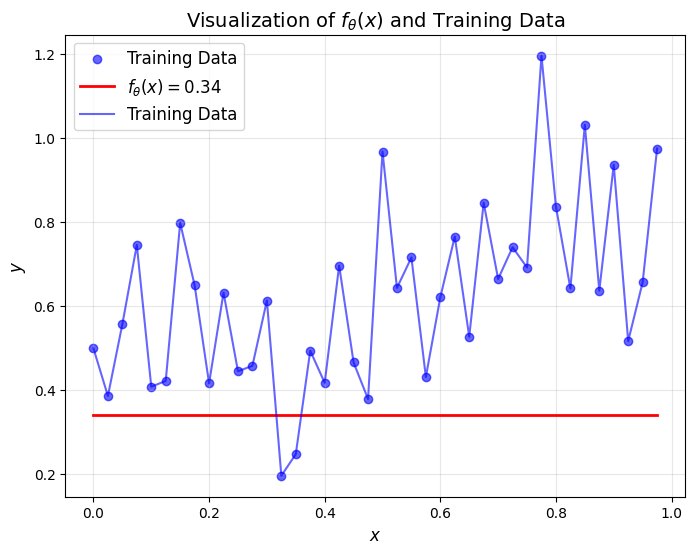

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Generate training data
np.random.seed(42)  # For reproducibility
x_train = np.arange(0.0, 1.0, 0.025)
y_train = 0.4 + x_train * 0.55 + np.random.randn(x_train.shape[0]) * 0.2

# Define the model f_theta(x) = theta
theta = 0.34
f_theta = np.full_like(x_train, theta)

# Plot the training data and the model
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, label="Training Data", color="blue", alpha=0.6)
plt.plot(x_train, f_theta, label=r"$f_\theta(x) = 0.34$", color="red", linewidth=2)

plt.plot(x_train,y_train, label="Training Data", color="blue", alpha=0.6)
# Add labels, title, and legend

plt.title("Visualization of $f_\\theta(x)$ and Training Data", fontsize=14)
plt.xlabel("$x$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)


### Task 2b

Create a plot that shows the loss curve for $\theta$ in the range [0, 1], using the Mean Squared Error loss function.  
That is, $L(x, y) = \frac{1}{m} \sum [ f_\theta(x_k) - y_k)^2 ]$. Where $m$ is the number of data points in the training set. Remember: $f_{\theta}(x) = \theta$.


Using the plot find the value of $\theta$ that minimize the loss.


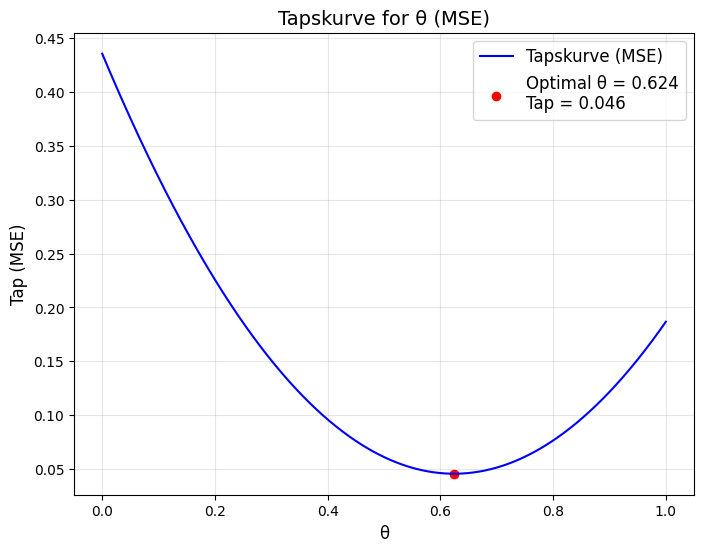

Optimal θ: 0.624, Minimum tap: 0.046


In [16]:

# Definer Mean Squared Error (MSE) tapsfunksjonen
def mse_loss(theta, x, y):
    f_theta = np.full_like(x, theta)  # f_theta(x) = theta
    return np.mean((f_theta - y) ** 2)

# Generer verdier for theta i intervallet [0, 1]
theta_values = np.linspace(0, 1, 10000)
loss_values = [mse_loss(theta, x_train, y_train) for theta in theta_values]


#print("Loss_V = ", loss_values)

# Finn theta som minimerer tapet
optimal_theta = theta_values[np.argmin(loss_values)]
min_loss = min(loss_values)

# Plot tapskurven
plt.figure(figsize=(8, 6))
plt.plot(theta_values, loss_values, label="Tapskurve (MSE)", color="blue")
plt.scatter(optimal_theta, min_loss, color="red",
            label=f"Optimal θ = {optimal_theta:.3f}\nTap = {min_loss:.3f}")

# Legg til tittel, aksetitler og legende
plt.title("Tapskurve for θ (MSE)", fontsize=14)
plt.xlabel("θ", fontsize=12)
plt.ylabel("Tap (MSE)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Vis grafen
plt.show()

# Print optimal theta og tap
print(f"Optimal θ: {optimal_theta:.3f}, Minimum tap: {min_loss:.3f}")


### Task 2c
Redo Task 2b, however, this time we want the model to be $f_\theta(x) = ax + b$ with $a,b \in \theta$.  
1) Set $b = 0.1$ and plot the loss curve over $a \in [-1, 1]$.
2) Set $b = 2.0$ and plot the loss curve over $a \in [-1, 1]$.  
3) Demonstrate, in this particular case, how these loss curves tells us how the data looks like. (No code - just explain).

S)
Når B = 2, data går bort fra sann data.
    Når B = 0.1, data går nærmerer data.
    Linjene krysser hverandre i starten.
    Siden B = 0.1 har jevn lik loss, betyr det at den er i nærheten av alle punktene, men begynner litt lengre unna enn b2".
    mens  B = 2.0 starter i nærheten av punktene men går lengre og lengre vekk fra punktene.

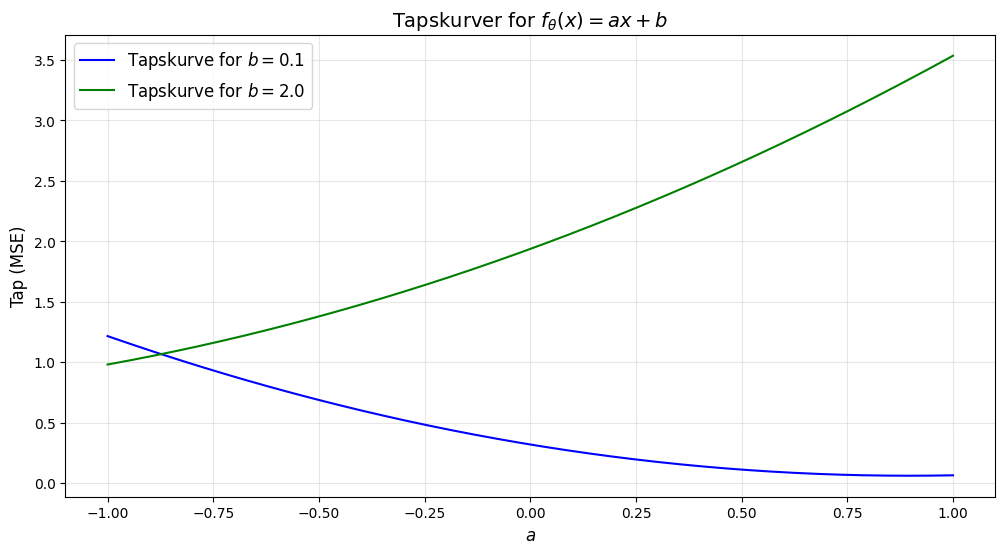

In [17]:
import numpy as np
import matplotlib.pyplot as plt


def mse_loss_ab(a, b, x, y):
    f_theta = a * x + b  # f_theta(x) = a*x + b
    return np.mean((f_theta - y) ** 2)

np.random.seed(42)
x_train = np.arange(0.0, 1.0, 0.025)
y_train = 0.4 + x_train * 0.55 + np.random.randn(x_train.shape[0]) * 0.2

a_values = np.linspace(-1, 1, 1000)

b_1 = 0.1

loss_values_b1 = [mse_loss_ab(a, b_1, x_train, y_train) for a in a_values]

b_2 = 2.0
loss_values_b2 = [mse_loss_ab(a, b_2, x_train, y_train) for a in a_values]

plt.figure(figsize=(12, 6))

plt.plot(a_values, loss_values_b1, label=f"Tapskurve for $b = {b_1}$", color="blue")

plt.plot(a_values, loss_values_b2, label=f"Tapskurve for $b = {b_2}$", color="green")

plt.title("Tapskurver for $f_\\theta(x) = ax + b$", fontsize=14)
plt.xlabel("$a$", fontsize=12)
plt.ylabel("Tap (MSE)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

plt.show()


# Task 3
Train a  linear regression with a L2 loss on the training data using Gradient Descent. 
The code below should give a (non-vectorized) on how it is found.  

The gradient is found as:  
$ L = \frac{1}{2}(\hat{y} - y )^2 $  

$ \hat{y} = f_\theta(x) = \theta$  


$ \frac{\partial L}{\partial\theta} = \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial \theta}$ (using the chain rule).

With:  
$\frac{\partial L}{\partial \hat{y}} = (\hat{y} - y) \times 1 = (\hat{y} - y)$  

$\frac{\partial \hat{y}}{\partial \theta} = 1  $


Gives us:  
$\frac{\partial L}{\partial\theta} = (\hat{y} - y)$


### Questions:
1) Draw the graph/tree that shows how these partial derivatives are connected. 
2) Find a set of hyperparameters that converge for $\theta_{\text{init}} = 5.5$.  How can we determine if the algorithm has converged?  
3) Can you find a learning rate that the algorithm does not converge for?  
4) What is the "best" learning rate for this particular dataset?  
5) You might be asked to show how the gradients flow in another loss/function : be prepared.



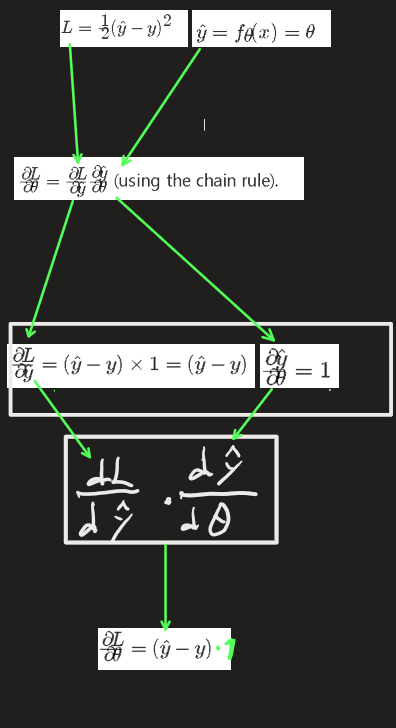


# Task 3.2: The lower the deltaLoss the better the convergence.

In [18]:
import numpy as np
%pip install plotly pandas
import plotly.express as px
import plotly.graph_objects as go


def gradient_of_J(theta, x, y):
    # 
    y_hat = theta
    
    # dL / dy_hat
    dLdy = (y_hat - y)
    
    # dy_hat / dTheta
    dy_HatdTheta = 1
    
    # chain rule
    dLdTheta = dLdy * dy_HatdTheta
    
    return dLdTheta


def calculate_l2_loss_non_vectorized(theta, xs, ys):
    loss = 0.0
    for k in range(ys.shape[0]):
        y_pred = theta 
        loss += (y_pred - ys[k])**2

    
    mean_loss = loss / ys.shape[0]
    return mean_loss


    

initial_theta = 5.5

learning_rate = 0.1
theta = np.array([initial_theta])
m = x_train.shape[0]
n_steps = 10

print("Running GD with initial theta: {:.2f}, learning rate: {} over {} datapoints for {} steps".format(
    theta.item(),
    learning_rate,
    m,
    n_steps))



search_history = []
for steps in range(n_steps):    
        
    gradient_theta_sum = 0.0
    for k in range(m):
        gradient_theta_sum += gradient_of_J(theta, x_train[k], y_train[k]) 

    mean_gradient = (1/m) * gradient_theta_sum
    loss = calculate_l2_loss_non_vectorized(theta, x_train, y_train)

    print("[visit] theta: {:.2f} => loss: {:.2f}".format(theta.item(), loss.item()))

    # update theta using GD
    theta = theta - (learning_rate * mean_gradient)
    search_history.append((theta, loss))

    


# quick helper to generate plots 
loss_x = np.arange(-4, 6, 0.01)

loss_y = np.array([calculate_l2_loss_non_vectorized(t, x_train, y_train) for t in loss_x])

fig = px.line(x=loss_x, y=loss_y, title="GD History : Marks are iterations.")


x_visit, _ = list(zip(*search_history))
x_visit = np.concatenate(x_visit)
y_visit = np.array([calculate_l2_loss_non_vectorized(t, x_train, y_train) for t in x_visit])

fig.add_trace(go.Scatter(x=x_visit, y=y_visit, name='GD history',
                         line = dict(color='firebrick', width=8, dash='dot')))

fig.show()

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ImportError: Plotly express requires pandas to be installed.

## Task 4: Gradient Descent
Below is a simple vectorized impl. of GD that can be used as a starting point. 
Please make sure you understand exactly HOW it works (so that you could have implemented one yourself).

1) Change the code to use Stochastic Gradient Descent with mini-batches. (Batch size should be 2 or more).
2) Re-organize the code and add numba as to make the SGD go pew pew (faster). To make it easier for yourself - numba does not always play nice with Jupyter, so consider running it in its own python file.
3) *OPTIONAL* numba also supports GPU (https://numba.readthedocs.io/en/stable/cuda) implement GPU acceleration for SDG.

Numba: https://numba.readthedocs.io/en/stable/


In [5]:
import numpy as np
import plotly.express as px

def predict(theta, xs): 
    return np.dot(xs, theta)

def J_squared_residual(theta, xs, y):
    h = predict(theta, xs)
    sr = ((h - y)**2).sum()    
    return sr

def gradient_J_squared_residual(theta, xs, y):
    h = predict(theta, xs) 
    grad = np.dot(xs.transpose(), (h - y)) 
    return grad


# the dataset (already augmented so that we get a intercept coef)
# remember: augmented x -> we add a colum of 1's instead of using a bias term.
data_x = np.array([[1.0, 0.5], [1.0, 1.0], [1.0, 2.0]])
data_y = np.array([[1.0], [1.5], [2.5]])
n_features = data_x.shape[1]

# variables we need 
theta = np.zeros((n_features, 1))
learning_rate = 0.1
m = data_x.shape[0]

# run GD
j_history = []
n_iters = 10
for it in range(n_iters):    
    j = J_squared_residual(theta, data_x, data_y)
    j_history.append(j)
    
    theta = theta - (learning_rate * (1/m) * gradient_J_squared_residual(theta, data_x, data_y))
    
print("theta shape:", theta.shape)

# append the final result.
j = J_squared_residual(theta, data_x, data_y)
j_history.append(j)
print("The L2 error is: {:.2f}".format(j))


# find the L1 error.
y_pred = predict(theta, data_x)
l1_error = np.abs(y_pred - data_y).sum()
print("The L1 error is: {:.2f}".format(l1_error))


# Find the R^2 
# if the data is normalized: use the normalized data not the original data (task 3 hint).
# https://en.wikipedia.org/wiki/Coefficient_of_determination
u = ((data_y - y_pred)**2).sum()
v = ((data_y - data_y.mean())** 2).sum()
print("R^2: {:.2f}".format(1 - (u/v)))


# plot the result
fig = px.line(j_history, title="J(theta) - Loss History")
fig.show()


theta shape: (2, 1)
The L2 error is: 0.03
The L1 error is: 0.25
R^2: 0.97


# KKD Real Estate

### Note: no pandas, sklearn or similar libraries should be used, numpy, dash, numba and plotly should be sufficient. Ask if you wonder about a library.
### Implementing your own SGD/GD is a core component of this task.

The project consists of 5 parts: 

1) 
Go though the data and understand how encode the various features. 
* Clean the data for potential noise and simply wrong input.
* Make sure you identify how a linear classifier will be affected by the encoding scheme. 
* How do you handle missing data?
* How are the different features connected?
* Encode the features.

2)
Identify objectives that could be valuable for KKD Real Estate, the objectives comes in two flavors:
* Answering questions, such as: What is a fair price for our ad packages? How is our best agent?
* Creating dashboards/interfaces that for instance: can predict the marked price for a house or maybe tell 
the probability of the house being sold in X amount of days?
* To pass the handin you at least need to implement a price model. 

3) 
Train a/many linear model(s) based on the data to solve the objectives.

4) 
Implement the dashboard interface such that we can input the nessesary parameters.
(See 'kkd_dashboard.py' on canvas for a starting point for the dashboard.)  
This interface should be powered by your models.

5) 
A client wants to know how the price model works, my inspecting the weights (that is: $\theta$) give a 
overview of the most important factors in the model. What are *key-drives* in the model?


### Deliverables
A presentation of the findings, a short written log of the work (bullet points / jupyter), a dashboard, and all code that you have.


### Dataset
* agents.jsonl - the real estate agents.
* districts.jsonl - the city districts
* houses.jsonl - the houses that has been on the marked the last year
* schools.jsonl - info about the schools in the districts


